In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def capacity_constrained_ot(x, y, m, n, gamma0, hbar, lmb):
    """
    Constrained Optimal Transport using Dykstra Algorithm
    Reference: Benamou, Carlier, Cuturi, Nenna, Peyré
    "Iterative Bregman Projections for Regularized Transportation Problems"

    Parameters
    ----------
    x, y : 1D numpy arrays
        Grids associated with first and second marginal
    m, n : 1D numpy arrays
        Marginals (mu, nu)
    gamma0 : 2D numpy array
        Initial gamma_ij = exp(-c_ij / lambda)
    hbar : 2D numpy array
        Capacity constraint matrix
    lmb : float
        Entropic regularization parameter

    Returns
    -------
    gamma : 2D numpy array
        Optimal transport plan
    """

    N = len(x)
    wx = x[1] - x[0]
    wy = y[1] - y[0]

    err = 1.0

    # Matrices for Dykstra
    q1 = np.ones((N, N))
    q2 = np.ones((N, N))
    q3 = np.ones((N, N))

    gamma1 = gamma0.copy()
    gamma2 = gamma0.copy()
    gamma3 = gamma0.copy()
    gamma = gamma0.copy()
    gammaN = gamma0.copy()

    oo = np.ones((1, N))
    count = 1

    C = 3

    while err > 1e-4:
        if count % C == 1:
            tmp1 = gamma * q1
            gammaN = np.minimum(tmp1, hbar) # C1 is the non-affine constraint \gamma \leq \bar{\gamma}
            q1 = tmp1 / gammaN
            gamma1 = gammaN
        elif count % C == 2:
            tmp1 = gamma * q2
            denom = np.sum(wy * tmp1, axis=1, keepdims=True)
            gammaN = tmp1 * (m[:, None] / denom) # C2 is the column normalisation constraint
            q2 = tmp1 / gammaN
            gamma2 = gammaN
        else:
            tmp1 = gamma * q3
            denom = np.sum(wx * tmp1, axis=0, keepdims=True)
            gammaN = tmp1 * (n[None, :] / denom) # C3 is the row normalisation constraint
            q3 = tmp1 / gammaN
            gamma3 = gammaN

        if count >= 3:
            err = (
                np.sum(np.abs(gammaN - gamma1))
                + np.sum(np.abs(gammaN - gamma2))
                + np.sum(np.abs(gammaN - gamma3))
            ) * wx * wy

        print(f"Error at step ({count}): {err}")
        gamma = gammaN
        count += 1

    # Plot gamma
    plt.pcolormesh(x, y, gamma, shading="auto", cmap="gray_r")
    plt.colorbar()
    plt.show()

    return gamma


In [35]:
N = 101
xa, xb = 0, 1
ya, yb = 0, 1
x = np.linspace(xa, xb, N)
y = np.linspace(ya, yb, N)

def mu(x):
    return ((x >= xa) & (x <= xb)).astype(float)

def nu(x):
    return ((x >= ya) & (x <= yb)).astype(float)

oo = np.ones((1, N))
lmb = 1e-3

# exponential kernel
def h(x, y):
    return np.exp(-(0.5 * (np.abs(x - y) ** 2)) / lmb)

gamma0 = h(x[:, None], y[None, :])

# capacity constraint
hbar = (3) * np.ones((N, N))

# normalize marginals if not equal total mass
m = mu(x)
n = nu(y)

Error at step (1): 1.0
Error at step (2): 1.0
Error at step (3): 0.9461087286395865
Error at step (4): 1.217433591435345
Error at step (5): 1.0571520286769558
Error at step (6): 0.6371842707485413
Error at step (7): 1.076828497619651
Error at step (8): 0.784593241074024
Error at step (9): 0.5730140647171461
Error at step (10): 0.9794497077300117
Error at step (11): 0.6528806429928825
Error at step (12): 0.5283238254474073
Error at step (13): 0.905661511743415
Error at step (14): 0.581519064592206
Error at step (15): 0.4950647052467761
Error at step (16): 0.8381068150788135
Error at step (17): 0.5411891714954152
Error at step (18): 0.4641115816955864
Error at step (19): 0.7874514655124564
Error at step (20): 0.4950632849861916
Error at step (21): 0.4417986059192717
Error at step (22): 0.7370514074729841
Error at step (23): 0.46791452927868415
Error at step (24): 0.4182353081603848
Error at step (25): 0.7007749321217165
Error at step (26): 0.43421858863901713
Error at step (27): 0.402777

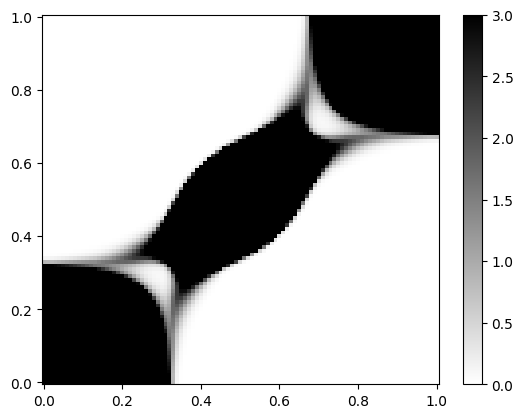

In [36]:
gamma = capacity_constrained_ot(x, y, m, n, gamma0, hbar, lmb)

Error at step (1): 1.0
Error at step (2): 1.0
Error at step (3): 0.9461087286395865
Error at step (4): 1.5650110201012708
Error at step (5): 1.352573848729463
Error at step (6): 0.8147004690292451
Error at step (7): 1.4702709615982181
Error at step (8): 1.0293735005746745
Error at step (9): 0.7746193282367463
Error at step (10): 1.399329674637938
Error at step (11): 0.9131836141212415
Error at step (12): 0.7452158530621467
Error at step (13): 1.3426341172571492
Error at step (14): 0.8357860227544421
Error at step (15): 0.7214921085482279
Error at step (16): 1.2977547557296985
Error at step (17): 0.7830043047688006
Error at step (18): 0.7032116787207089
Error at step (19): 1.2590097140704197
Error at step (20): 0.7507599178474721
Error at step (21): 0.6873404004510617
Error at step (22): 1.22174450756592
Error at step (23): 0.7304011370822922
Error at step (24): 0.67193901611657
Error at step (25): 1.1862675866638754
Error at step (26): 0.710327998155906
Error at step (27): 0.6574275781

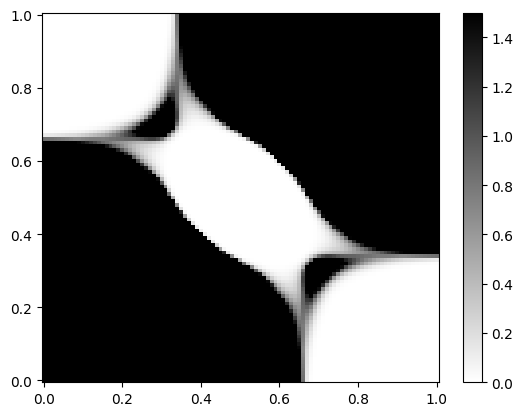

In [37]:
gamma = capacity_constrained_ot(x, y, m, n, gamma0, (3/2) * np.ones((N, N)), lmb)